# PySESync: SE-Sync Python bindings 🐍

This notebook demonstrates the use of SE-Sync's Python bindings

In [2]:
import sys
import numpy as np
from matplotlib import pyplot as plt

Import the SE-Sync Python library built using pybind

In [3]:
import PySESync

Load in some data from a .g2o file

In [15]:
filename = "../../data/intel.g2o"

measurements, num_poses = PySESync.read_g2o_file(filename)

d = measurements[0].R.shape[0]

print("Loaded %d measurements between %d %d-dimensional poses from file %s" % (len(measurements), num_poses, d, filename))

Loaded 2512 measurements between 1728 2-dimensional poses from file ../../data/intel.g2o


**Run SE-Sync!**

Set SE-Sync options

In [16]:
opts = PySESync.SESyncOpts()
opts.num_threads = 4
opts.verbose=True

opts.formulation = PySESync.Formulation.Simplified    # Options are: Simplified, Explicit, SOSync (rotation averaging)
opts.initialization = PySESync.Initialization.Chordal   # Options are Chordal or Random

In [17]:
result = PySESync.SESync(measurements, opts)

Constructing SE-Sync problem instance ... elapsed computation time: 0.007 seconds

========= SE-Sync ==========

ALGORITHM SETTINGS:

SE-Sync settings:
 SE-Sync problem formulation: Simplified
 Initial level of Riemannian staircase: 5
 Maximum level of Riemannian staircase: 10
 Number of Lanczos vectors to use in minimum eigenvalue computation: 20
 Maximum number of iterations for eigenvalue computation: 10000
 Tolerance for accepting an eigenvalue as numerically nonnegative in optimality verification: 1e-05
 Using Cholesky decomposition to compute orthogonal projections
 Initialization method: chordal
 Running SE-Sync with 4 threads

Riemannian trust-region settings:
 Stopping tolerance for norm of Riemannian gradient: 0.01
 Stopping tolerance for norm of preconditioned Riemannian gradient: 0.0001
 Stopping tolerance for relative function decrease: 1e-07
 Stopping tolerance for the norm of an accepted update step: 0.001
 Maximum number of trust-region iterations: 1000
 Maximum number 

**Plot some interesting data about the solution process**

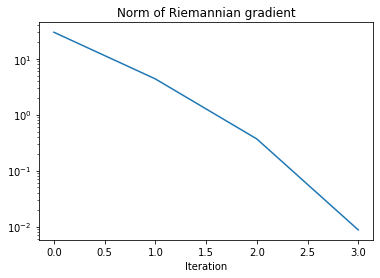

In [18]:
# Plot sequence of Riemannian gradient norms
grad_norms = np.concatenate(result.gradient_norms)
plt.semilogy(grad_norms)
plt.title("Norm of Riemannian gradient")
plt.xlabel("Iteration")
plt.show()

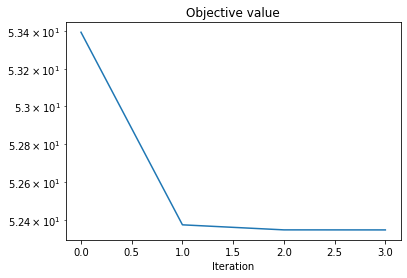

In [19]:
# Plot sequence of objective values
fvals = np.concatenate(result.function_values)
plt.semilogy(fvals)
plt.title("Objective value")
plt.xlabel("Iteration")
plt.show()

**Plot estimated SLAM solution**

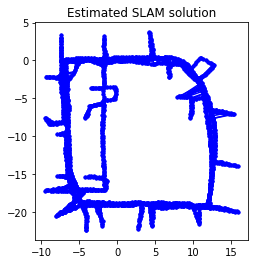

In [20]:
# Extract translational states from solution xhat
xhat = result.xhat
R0inv = np.linalg.inv(xhat[:, num_poses : num_poses + 2])
t = np.matmul(R0inv, xhat[:, 0:num_poses])

# Plot the position of each estimated pose, together with the edges between them
for k in range(0, len(measurements)):
    plt.plot(t[0, [measurements[k].i, measurements[k].j]], t[1, [measurements[k].i, measurements[k].j]], '.-b')

plt.title("Estimated SLAM solution")

plt.gca().set_aspect('equal')
plt.show()